In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("data.csv")
#data_by_artist = pd.read_csv("data_by_artist.csv")
#data_by_genres = pd.read_csv("data_by_genres.csv")
data_by_year = pd.read_csv("data_by_year.csv")
#data_w_genres = pd.read_csv("data_w_genres.csv")

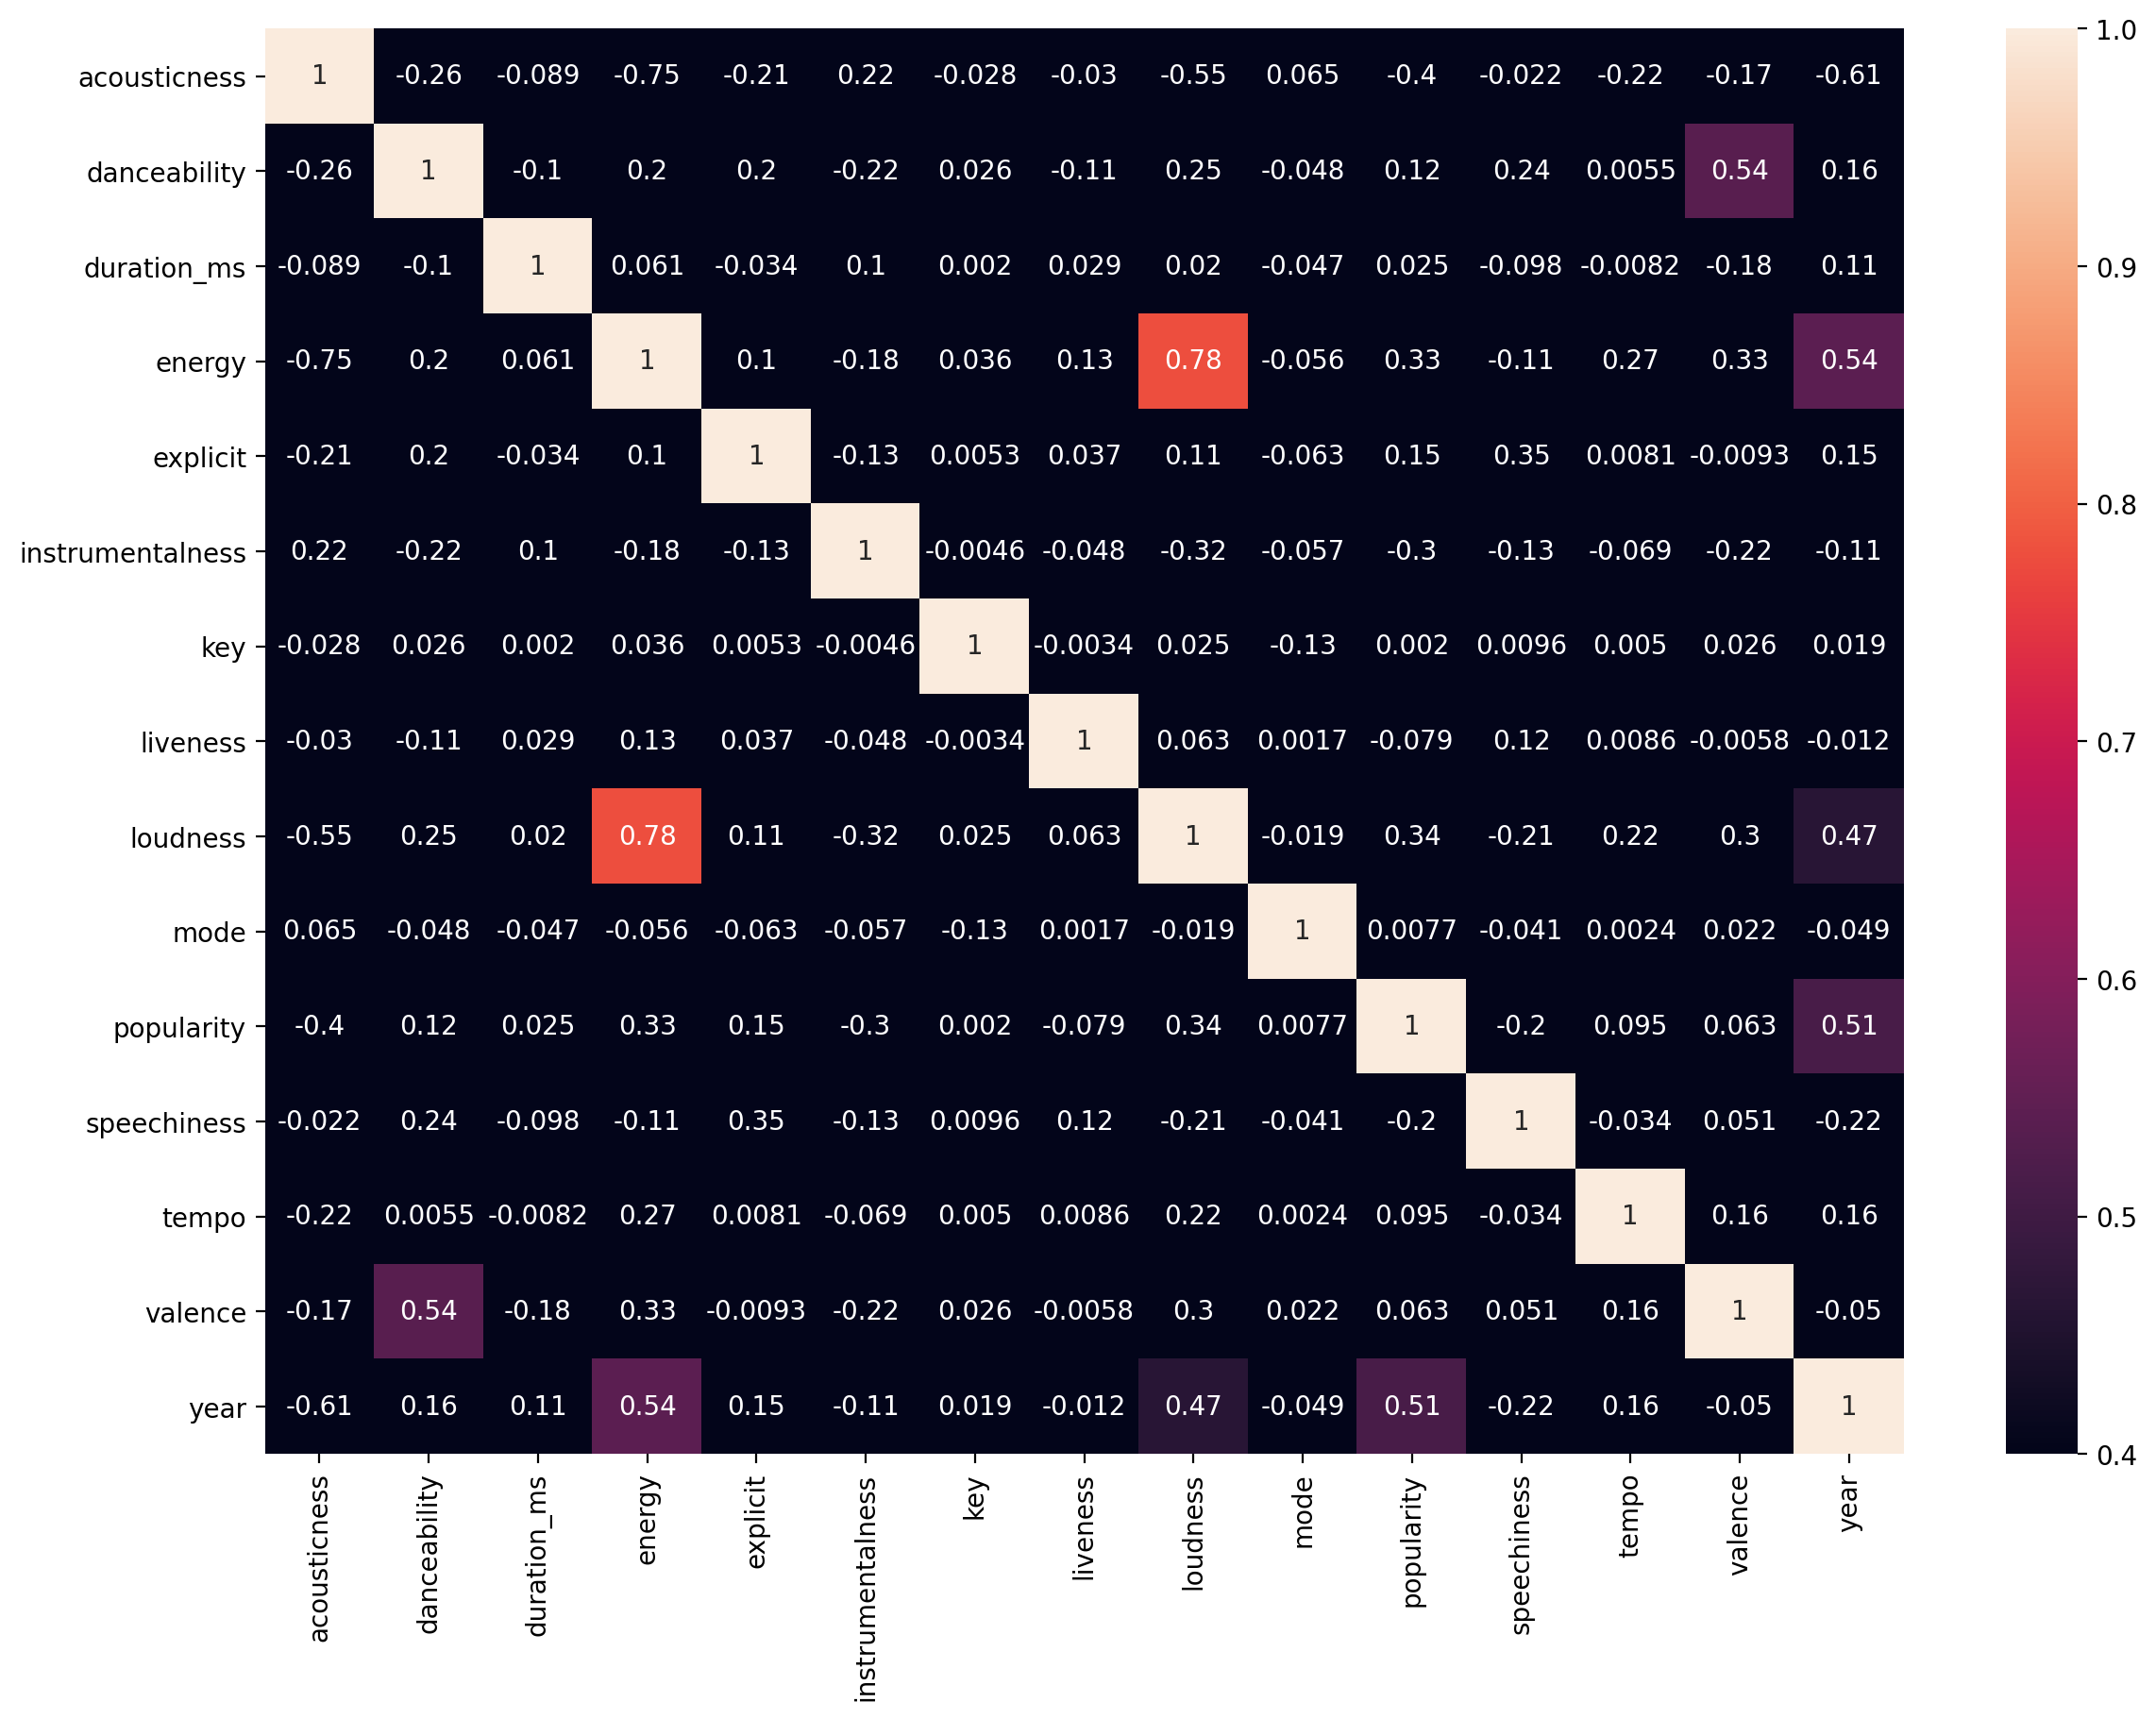

In [3]:
data_corr = data.drop(labels="name", axis=1)
data_corr = data.drop(labels="id", axis=1)
data_corr = data.drop(labels="artists", axis=1)
plt.figure(figsize=(14, 10) , dpi=200)
sns.heatmap(data_corr.corr(), annot=True ,vmin=0.4 );

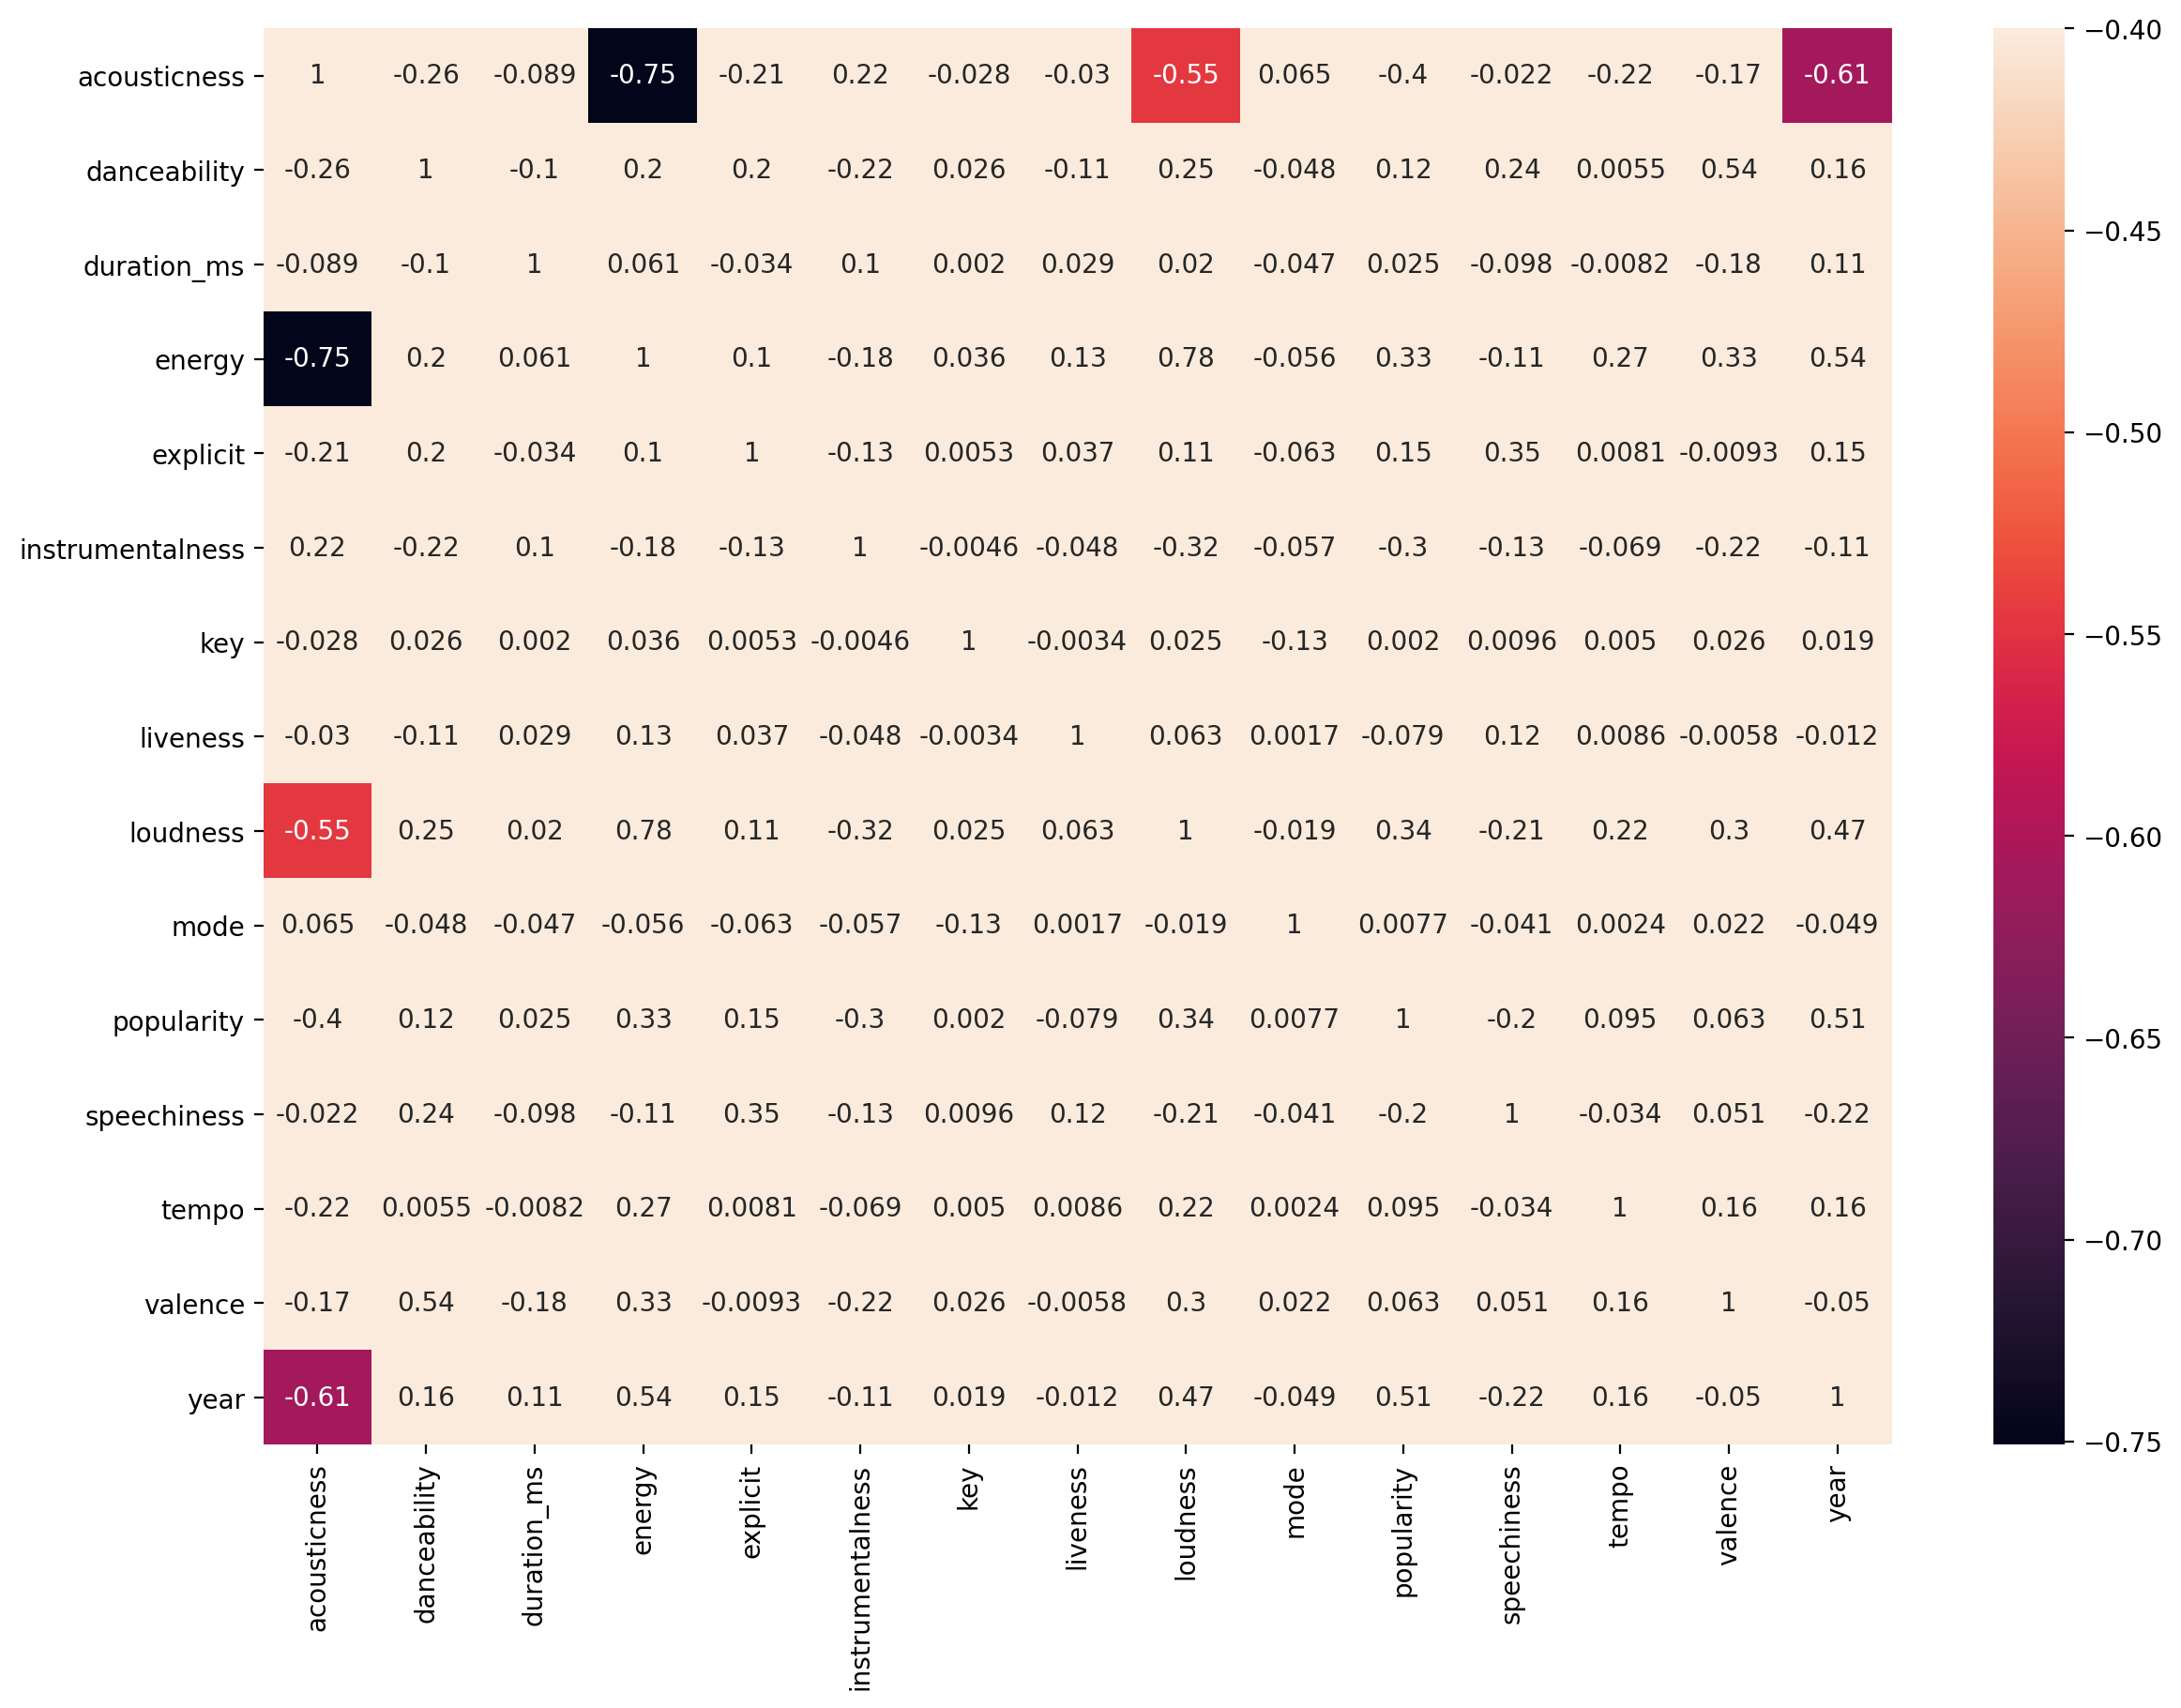

In [4]:
plt.figure(figsize=(14, 10) , dpi=200)
sns.heatmap(data_corr.corr(), annot=True ,vmax=-0.4);

In [5]:
#Зафиксируем корреляцию велечин
# (energy , loudness)        
# (energy , year) 
# (loudness , year) 
# (popularity , year) 
# (danceability , valence) 
# (acousticness , year) 
# (energy , acousticness) 
# (loudness , acousticness) 
# Можно сделать вывод ,что год производства сильно влияет на остальные велечины 

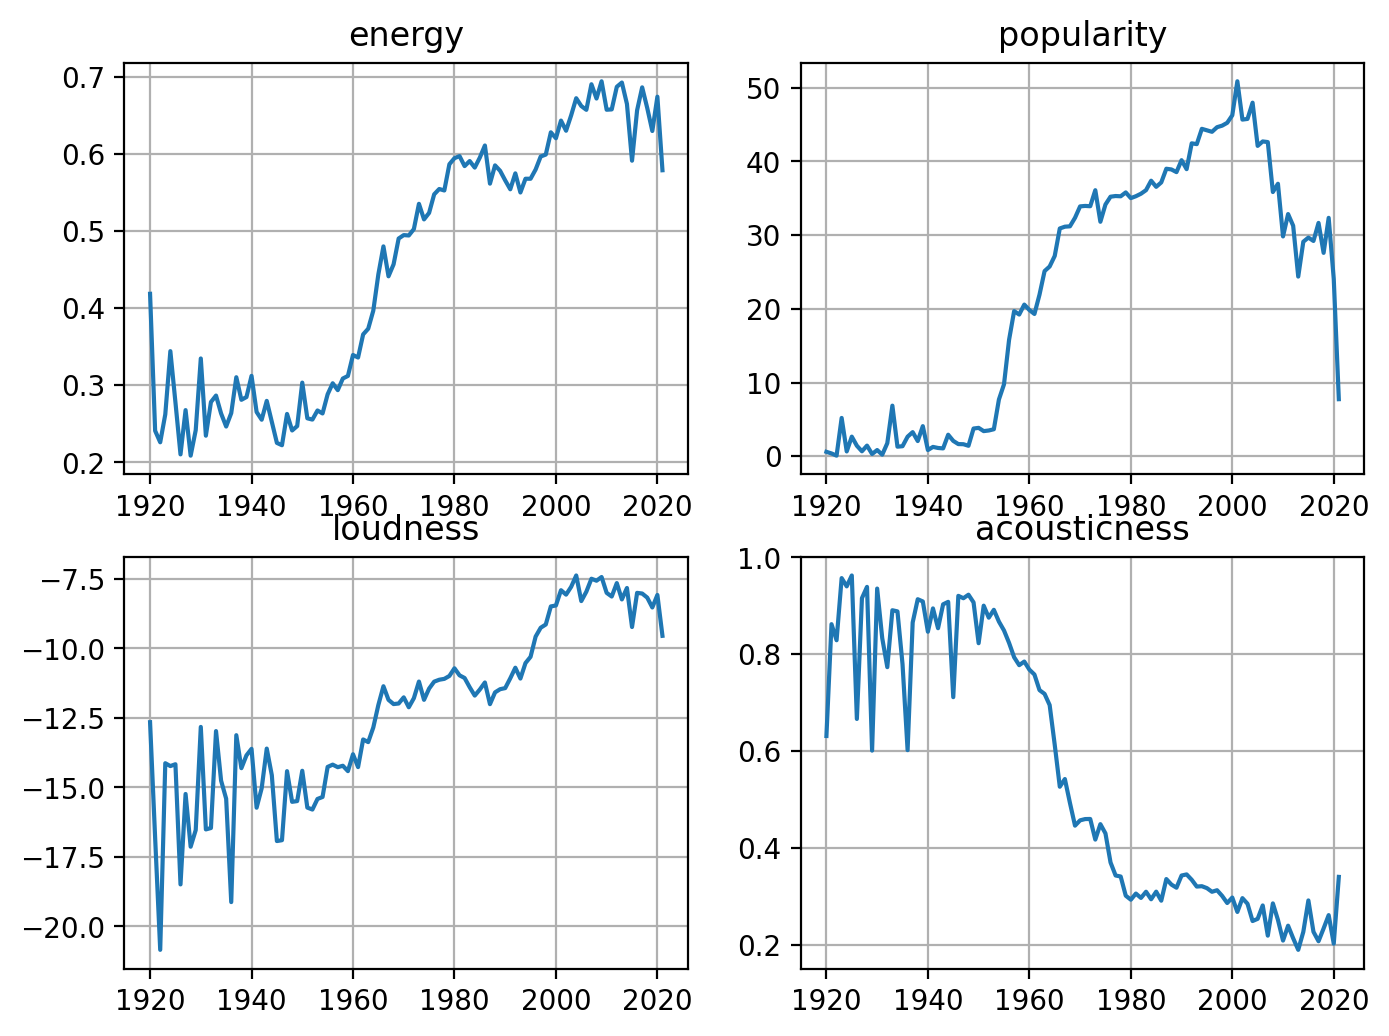

In [6]:
x=data_by_year["year"]
fig, ax = plt.subplots(2, 2)
fig.set_size_inches((8, 6))
fig.set_dpi(200)
values = [data_by_year["energy"], data_by_year["popularity"], data_by_year["loudness"],data_by_year["acousticness"]]
names = ["energy", "popularity", "loudness", "acousticness"]
for i in range(2):
    for j in range(2):
        ax[i, j].plot(x, values[i * 2 + j])
        ax[i, j].set_title(names[i * 2 + j])
        ax[i, j].grid()
       

In [7]:
# Вывод : со временем музыка становится более энергичной ,громкой , реже используется акустика .
# Есть рост средней популярности музыки с 1950 года по 2000 год , далее идет спад  

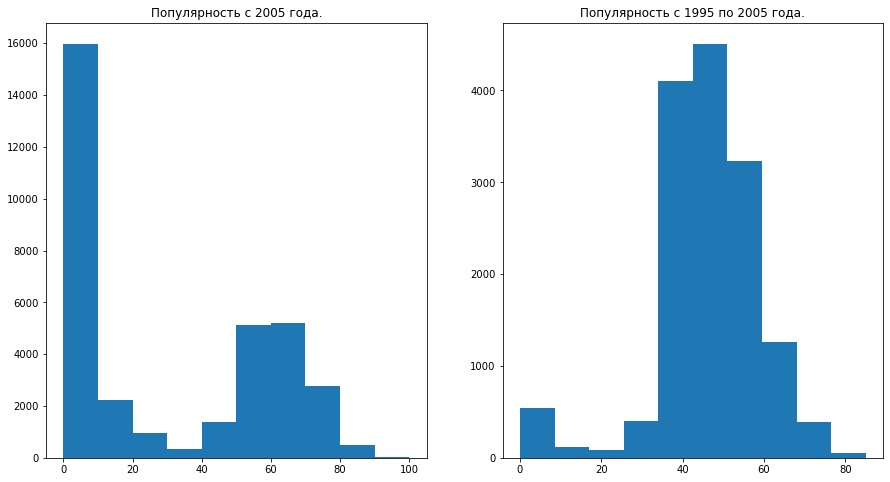

In [8]:
 
fig, axs = plt.subplots(1, 2,figsize=(15,8) )
axs[0].hist(data[(data["year"]>2005) ]['popularity']   )
axs[0].set_title('Популярность с 2005 года.')
axs[1].hist(data[(data["year"]<2005)&  (data["year"]>1995)]['popularity']    )
axs[1].set_title( 'Популярность с 1995 по 2005 года.')
plt.show()

In [9]:
# Вывод : низкая средняя популярность "новой" музыки связана с большим количеством малопопулярной музыки .

In [10]:
len(  data[(data["year"]<2005)&  (data["year"]>1995) & (data["popularity"]>50)])

4932

In [11]:
len(  data[(data["year"]>2010)  & (data["popularity"]>50)])

9585

In [12]:
# причем количество популярной "новой" музыки все равно больше.

In [13]:
#КОНЕЦ 

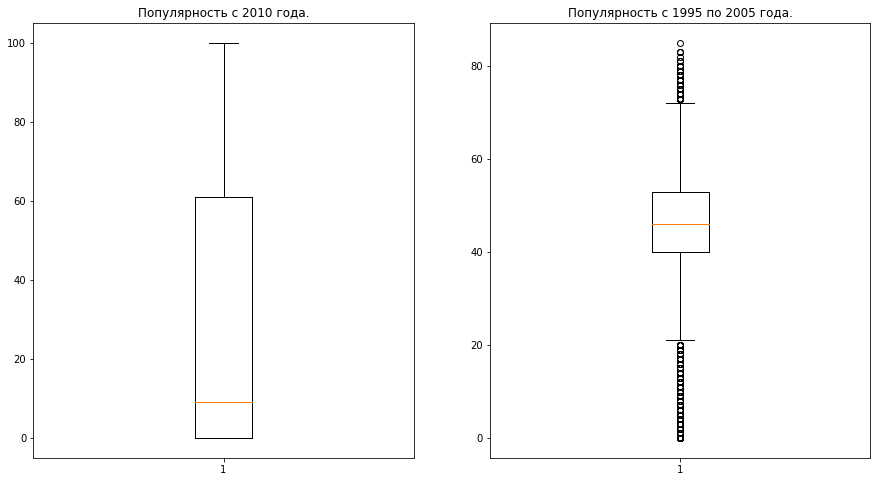

In [14]:
fig, axs = plt.subplots(1, 2,figsize=(15,8) )
axs[0].boxplot(data[(data["year"]>2010) ]['popularity']   )
axs[0].set_title('Популярность с 2010 года.')
axs[1].boxplot(data[(data["year"]<2005)&  (data["year"]>1995)]['popularity']    )
axs[1].set_title( 'Популярность с 1995 по 2005 года.')
plt.show()

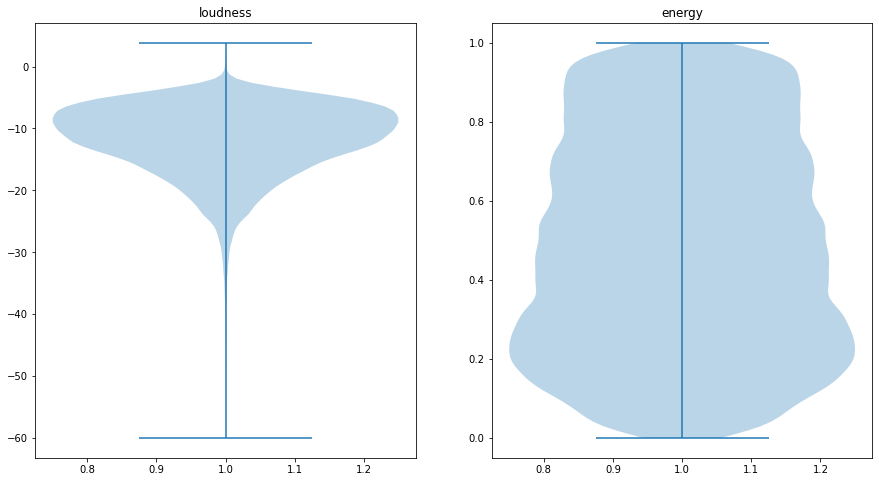

In [15]:
fig, axs = plt.subplots(1, 2,figsize=(15,8) )
axs[0].violinplot(data['loudness']   )
axs[0].set_title('loudness')
axs[1].violinplot(data['energy']    )
axs[1].set_title( 'energy')
plt.show()

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


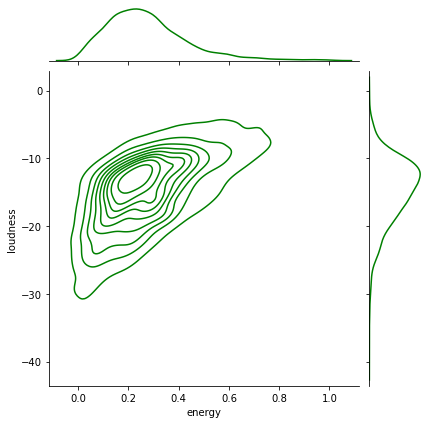

In [16]:
sns.jointplot("energy", "loudness", data=data_corr[:5000], kind="kde", color="green");